# Transformada de Fourier
La Transformada Rápida de Fourier (FFT) es uno de los algoritmos más importantes en el procesamiento de señales y análisis de datos. Definido y explicado por James W. Cooley y John W. Tukey en 1965 ([Paper original](http://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf)).

FFT es rápida porque tiene una complejidad computacional, esto es una cantidad de operaciones para realizar su objetivo, igual a $\mathcal{O}[N log N]$, mientras que la Transformada Discreta de Fourier (DFT) tiene una complejidad computacional igual a $\mathcal{O}[N^2]$. La DFT, como asi tambien la version continua de la transformada de fourier, tiene una función transformadora y otra inversa que revierte la transformación definidad asi:

#### Forward Discrete Fourier Transform (DFT):
$$X_k=\sum_{n=0}^{N-1}x_n \cdot e^{-i2\pi kn/N}$$

#### Inverse Discrete Fourier Transform (IDFT):
$$x_n={1 \over N}\sum_{k=0}^{N-1}X_k \cdot e^{i2\pi kn/N}$$

La transformación desde $x_n \to X_k$ es un traducción desde el dominio de configuración (tiempo o espacio) al dominio de las frecuencia. 

¿Para que sirve realizar esta traducción de un fenomeno al dominio de la frecuencia?
Muchas operaciones que en el dominio del tiempo o el espacio requieren calculos complejos para ser llevados a cabo, en el dominio de la frecuencia se puede realizar tambien, pero como una sucecion de simples sumas y restas. Luego de realizadas las operaciones, se aplica la IDFT sobre los $X_k$ y se obtienen nuevamente los datos en el dominio de configuración.

Por la importanca de la FFT en muchos campos, Python contiene muchas herramientas estandar y wrappers para realizar esta operación. NumPy y SciPy contienen wrappers the algoritmos extremadamente probados de la libreria FFTPACk, que se pueden encontrar en los submodulos **numpy.fft** y **scipy.fftpack** respectivamente. Tambien se puede acceser al paquete [Fast Fourier Transform in the West (FFTW)](http://www.fftw.org/), que es la mejor implementacion de FFT hasta la fecha, a partir del wrapper para Python [PyFFTW](https://pypi.python.org/pypi/pyFFTW).
## Implementando DFT
Por simplicidad, vamos a concentrarnos en la implementación de la **Forward DFT**, ya que la **IDFT** se puede calcular de manera similar. Viendo la expreción de DFT definida anteriormente, vemos que es nada mas, y nada menos, que una operacion linieal: una multiplicación de matriz-vector de $\overrightarrow{x}$

$$\overrightarrow{X}=M  \cdot \overrightarrow{x}$$

con la matriz M igual a

$$M_{kn}=e^{-i2\pi kn\;/\;N}$$

Con esto en mente, podemos computar la DFT usando multiplicación simple de matrices de la siguiente forma:

### **Ejercicio 1**

1- Implementar algoritmo Discrete Fourier Transform (DFT) y comparar con la implementacion de NumPy o SciPy.

In [0]:
import numpy as np
def DFT(x):
    """Computo discrete Fourier Transform de un 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j*np.pi*k*n/N)
    return np.dot(M, x)

def IDFT(X):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = 1/N(np.exp(2j*np.pi*k*n/N))
    return np.dot(M, x)

In [0]:
x = np.random.random(1024)     #array de froma aleatoria .
np.allclose(DFT(x), np.fft.fft(x))   #compara la transfromada común implementada por nosotros con la de numpy. Deben tener el mismo resultado.

True

In [0]:
#Esto indica que la función de transformadas tanto común como inverza tienen una mayor velocidad de ejecución que las transformadas en forma matricial.
%time DFT(x)
%time np.fft.fft(x)

CPU times: user 132 ms, sys: 87.4 ms, total: 220 ms
Wall time: 128 ms
CPU times: user 102 µs, sys: 35 µs, total: 137 µs
Wall time: 71.8 µs


array([513.74602986 +0.j        ,   2.0197547 -10.89263402j,
        -5.90976546 -7.38960561j, ...,  10.90962636 -6.83941547j,
        -5.90976546 +7.38960561j,   2.0197547 +10.89263402j])

# **EJERCICIO 2:**

## **Montar el audio a analizar el cuál se encuentra guardado en la nube de google Drive.**

In [0]:
from google.colab import drive  
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **Tomar el audio montado y calcular sus deciveles o frecuencia de sampleo.**

In [0]:
from scipy.io import wavfile
samplerate, audio = wavfile.read('/content/drive/My Drive/superior/tp_señales.wav')  #calcula los deciveles.

In [0]:
from IPython.display import Audio #Mostrar audio.

# player audio mono
Audio(audio,rate=samplerate)

In [0]:
duracion = audio.shape[0]/samplerate  #matriz que muestra caracteristicas del audio. 
print("Total de muestras: {}".format(audio.shape[0]))
print("Ratio de sampleo: {}".format(samplerate))
print("Duración del audio: {}".format(duracion))

Total de muestras: 706560
Ratio de sampleo: 48000
Duración del audio: 14.72


## **Gráfica de las características del audio en función del tiempo.**

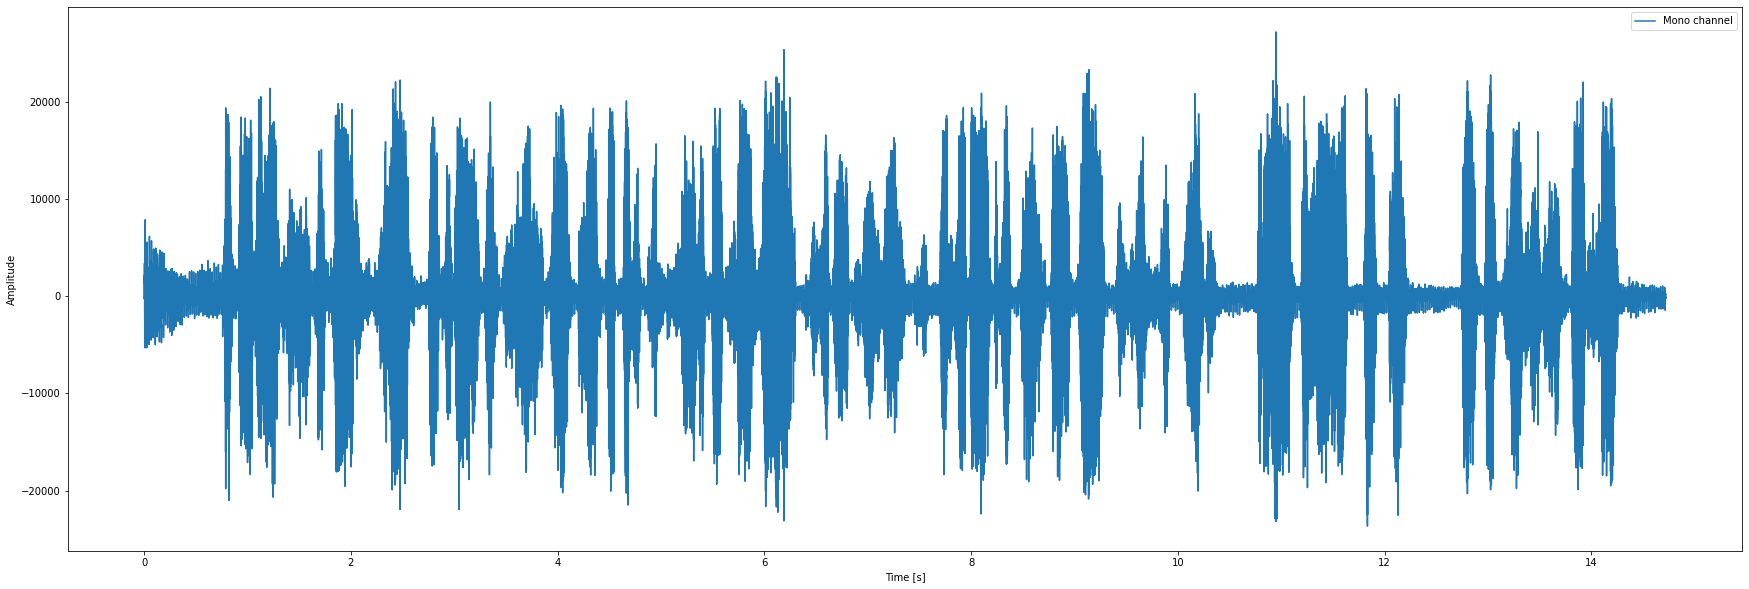

In [0]:
import matplotlib.pyplot as plt  
plt.rcParams["figure.figsize"] = (30,10)
import numpy as np

time = np.linspace(0., duracion, audio.shape[0])
plt.plot(time, audio, label="Mono channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

## **Aplicar la transformada de Fourier para transferir el audio al dominio de la frecuencia, para ello se define una frecuencia de muestreo con su respectiva distancia entre cada punto de muestreo. luego se muestra el resultado por gráfico.**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


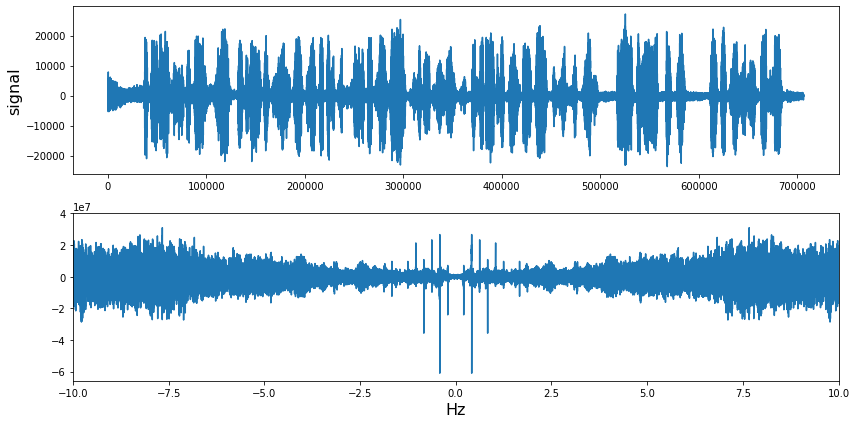

In [0]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
%matplotlib inline
import matplotlib.pyplot as plt

time   = np.linspace(0,10,2000)  #vector de tiempos linealmente espaciado donde se muestrea la señal. frecuencia de muestreo.
W = fftfreq(audio.size, d=time[1]-time[0]) #Frecuencia de muestreo o distancia de muestreo.  restar los 2 primero elementos de time para ver cuánto están espaciados los puntos.
f_audio = fft(audio)   #señal transfromada por Fourier.

# plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.plot(audio)
ax1.set_ylabel('signal',fontsize=16)

ax2.plot(W,f_audio)
ax2.set_xlabel('Hz',fontsize=16)
ax2.set_xlim(-10, 10)
fig.tight_layout()
plt.show()

#el gráfico muestra un comportamiento cíclico mediante el módulo por eso el gráfico es simétrico respecto al origen. 

## **Tomar el resultado de la transformada de Fourier aplicado con anterioridad sobre el audio, eliminar los puntos donde el ruido sea predominante y regresar el audio al dominio del tiempo, mediante la transformada inverza de Fourier, pero de forma depurada.**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


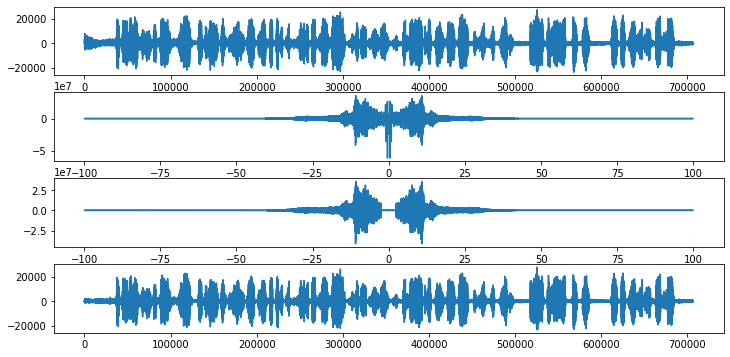

In [0]:
cut_f_audio = f_audio.copy()  #array que copia la señal de Fourier anterior.
# remuevo del vector todas las señales inferiores a 2.5 Hz
cut_f_audio[(-2.5<W)*(W<2.5)] = 0  #condición: W va a tener tantos elementos como f_audio. vector booleano, devuelve 0 en las posiciones en donde se cumple esa condición.
#donde se cumple la condición los puntos se remueven haciendose 0.
# IFFT para obtener la nueva señal en el dominio del tiempo.
cut_audio = ifft(cut_f_audio)

# plots para graficar.
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(hspace=0.25)

ax1 = fig.add_subplot(411)
ax1.plot(audio)

ax2 = fig.add_subplot(412)
ax2.plot(W,f_audio)

ax3 = fig.add_subplot(413)
ax3.plot(W,cut_f_audio)

ax4 = fig.add_subplot(414)
ax4.plot(cut_audio)

plt.show()

#Deja pasar las frecuencias altas y elimina las bajas.

## **Mostrar audio regresado al dominio del tiempo y con el ruido disminuido**

In [0]:
from IPython.display import Audio   

# player audio mono
Audio(cut_audio,rate=samplerate)

/usr/local/lib/python3.6/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
